# Task 1: Describe the Dataset

## Data Understanding
Goal: Understand the structure and basic properties of the dataset using Python (NumPy, pandas, Matplotlib/Seaborn).

1) Read the CSV file with pandas.read_csv and parse the datetime
column.

In [3]:
import pandas as pd

day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")

day["dteday"] = pd.to_datetime(day["dteday"])
hour["dteday"] = pd.to_datetime(hour["dteday"])

hour["datetime"] = hour["dteday"] + pd.to_timedelta(hour["hr"], unit="h")

df_pre = pd.merge(
    hour,
    day,
    on="dteday",
    how="left",
    suffixes=("_hour", "_day")
)

df = pd.DataFrame(
    {
        "datetime": df_pre["datetime"],
        "target": df_pre["cnt_hour"],
        "weather": df_pre["weathersit_hour"],
        "temp": df_pre["temp_hour"],
        "humidity": df_pre["hum_hour"],
        "windspeed": df_pre["windspeed_hour"],
        "season": df_pre["season_day"],
        "day_of_week": df_pre["weekday_day"],
        "is_holiday": df_pre["holiday_day"],
        "is_workingday": df_pre["workingday_day"]
    }
)

2. Report:
- Number of rows and columns.
- Time range covered by the data.
- Target variable and list of feature variables (names and data types).

In [4]:

def dataframe_report(df: pd.DataFrame, target_col: str, time_col: str):
    print("=== DATAFRAME REPORT ===\n")

    # Rows & Columns
    n_rows, n_cols = df.shape
    print(f"Number of rows: {n_rows}")
    print(f"Number of columns: {n_cols}\n")

    # Time range
    df[time_col] = pd.to_datetime(df[time_col], errors="coerce")
    start_date = df[time_col].min()
    end_date = df[time_col].max()
    print(f"Time range covered: {start_date} → {end_date}\n")

    # Target variable
    print("Target variable:")
    print(f"  - {target_col} ({df[target_col].dtype})\n")

    # Feature variables
    feature_cols = [col for col in df.columns if col not in [target_col, time_col]]
    print("Feature variables:")
    for col in feature_cols:
        print(f"  - {col}: {df[col].dtype}")

# Beispiel-Aufruf
dataframe_report(
    df=df,
    target_col="target",
    time_col="datetime"
)

=== DATAFRAME REPORT ===

Number of rows: 17379
Number of columns: 10

Time range covered: 2011-01-01 00:00:00 → 2012-12-31 23:00:00

Target variable:
  - target (int64)

Feature variables:
  - weather: int64
  - temp: float64
  - humidity: float64
  - windspeed: float64
  - season: int64
  - day_of_week: int64
  - is_holiday: int64
  - is_workingday: int64


3. Create a variable description table (see above for reference).

In [5]:
def create_variable_description_table(
    df: pd.DataFrame,
    target_col: str,
    time_col: str
) -> pd.DataFrame:

    rows = []

    for col in df.columns:
        if col == time_col:
            role = "time"
        elif col == target_col:
            role = "target"
        else:
            role = "feature"

        rows.append({
            "variable_name": col,
            "role": role,
            "data_type": df[col].dtype.name,
        })

    return pd.DataFrame(rows)

# Example usage
var_table = create_variable_description_table(
    df=df,
    target_col="target",
    time_col="datetime"
)

var_table

,variable_name,role,data_type
0,datetime,time,datetime64[ns]
1,target,target,int64
2,weather,feature,int64
3,temp,feature,float64
4,humidity,feature,float64
5,windspeed,feature,float64
6,season,feature,int64
7,day_of_week,feature,int64
8,is_holiday,feature,int64
9,is_workingday,feature,int64


4. Check for:
- Missing values per column.
- Duplicated rows (if any).

In [6]:
print(f'Number of duplicate rows: {df.duplicated().sum()}')
print(f'Number of missing values: {df.isna().sum().sum()}')

Number of duplicate rows: 0
Number of missing values: 0


## Descriptive statistics:

For numeric variables: calculate mean, standard deviation, minimum, maximum, and quartiles.

In [7]:
df[["target","temp","humidity","windspeed"]].describe()

,target,temp,humidity,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,189.463088,0.496987,0.627229,0.190098
std,181.387599,0.192556,0.192930,0.122340
min,1.000000,0.020000,0.000000,0.000000
25%,40.000000,0.340000,0.480000,0.104500
50%,142.000000,0.500000,0.630000,0.194000
75%,281.000000,0.660000,0.780000,0.253700
max,977.000000,1.000000,1.000000,0.850700


For categorical variables: show frequency tables or bar charts

In [8]:
categorical_cols = ["weather", "season", "is_holiday", "is_workingday"]

for col in categorical_cols:
    print(f"\n=== {col.upper()} ===")
    print(df[col].value_counts())



=== WEATHER ===
weather
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

=== SEASON ===
season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

=== IS_HOLIDAY ===
is_holiday
0    16879
1      500
Name: count, dtype: int64

=== IS_WORKINGDAY ===
is_workingday
1    11865
0     5514
Name: count, dtype: int64


## Visualisation

Plot the time series of total bike demand (count) over the full
period.

/tmp/ipykernel_453/3626981659.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


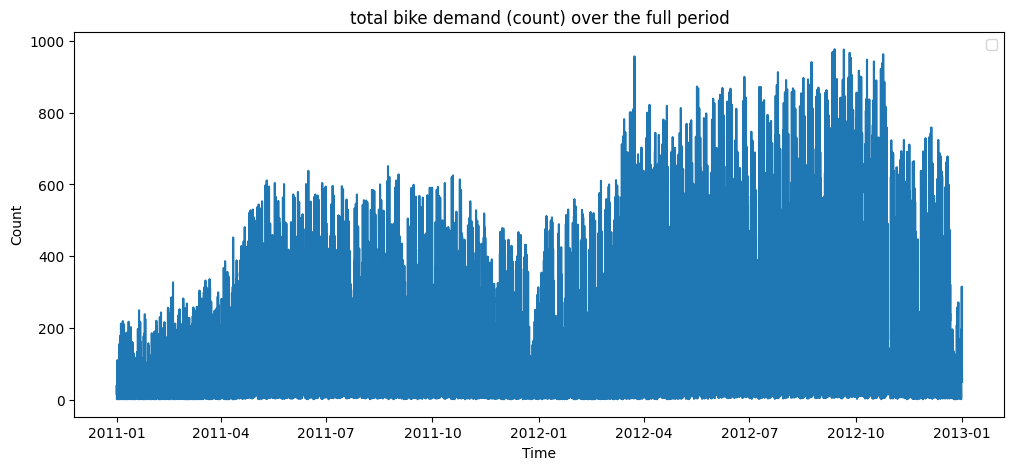

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(df["datetime"], df["target"])
plt.title("total bike demand (count) over the full period")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.show()

Plot distributions of key numeric variables

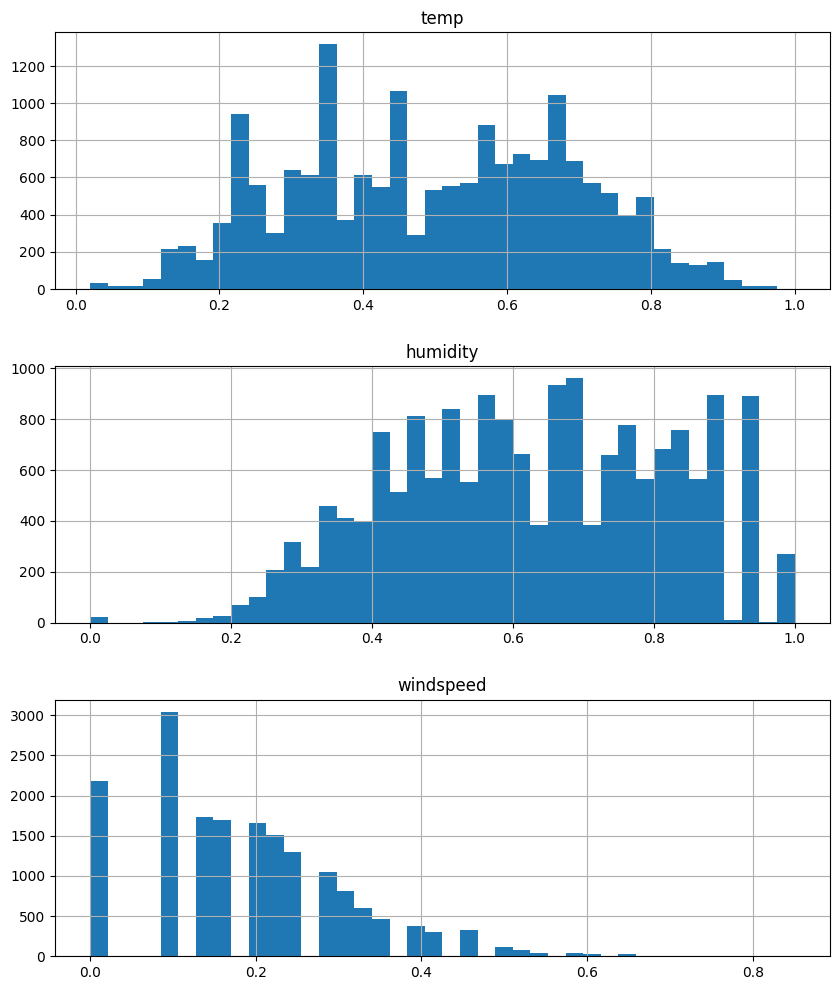

In [10]:
df[["temp", "humidity", "windspeed"]].hist(
    bins=40,
    layout=(3, 1),
    figsize=(10, 12)
    
)
plt.show()

Plot aggregated demand by season, day of week or hour of day

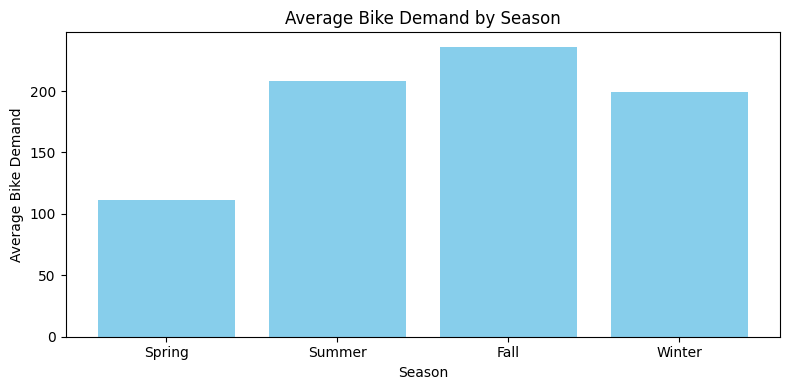

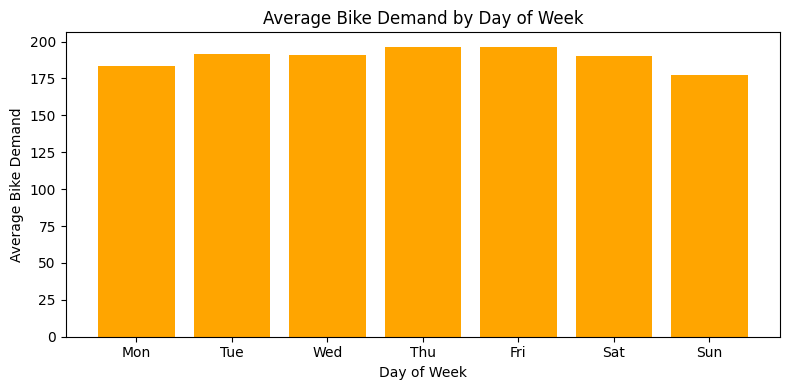

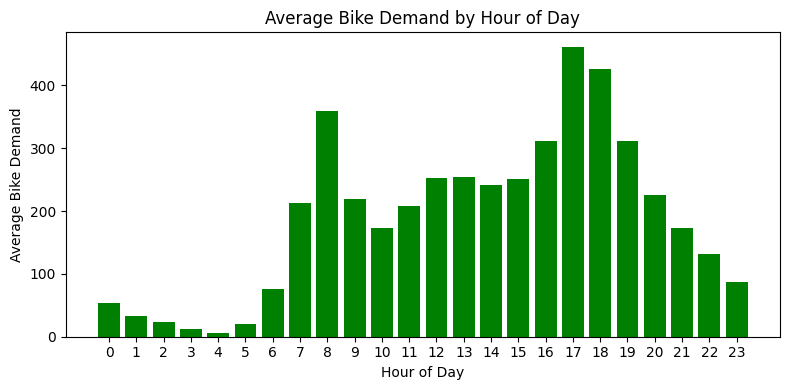

In [11]:

df_cpy = df.copy()

# Per Season
season_demand = df.groupby("season")["target"].mean()

plt.figure(figsize=(8, 4))
plt.bar(season_demand.index, season_demand.values, color="skyblue")
plt.xlabel("Season")
plt.ylabel("Average Bike Demand")
plt.title("Average Bike Demand by Season")
plt.xticks(season_demand.index, ["Spring", "Summer", "Fall", "Winter"])
plt.tight_layout()
plt.show()

# Per Day of Week
df_cpy["weekday"] = df["datetime"].dt.dayofweek  # 0 = Montag, 6 = Sonntag
weekday_demand = df_cpy.groupby("weekday")["target"].mean()

plt.figure(figsize=(8, 4))
plt.bar(weekday_demand.index, weekday_demand.values, color="orange")
plt.xlabel("Day of Week")
plt.ylabel("Average Bike Demand")
plt.title("Average Bike Demand by Day of Week")
plt.xticks(weekday_demand.index, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.tight_layout()
plt.show()

# Per Hour of Day
df_cpy["hour"] = df["datetime"].dt.hour
hourly_demand = df_cpy.groupby("hour")["target"].mean() 

plt.figure(figsize=(8, 4))
plt.bar(hourly_demand.index, hourly_demand.values, color="green")
plt.xlabel("Hour of Day")
plt.ylabel("Average Bike Demand")
plt.title("Average Bike Demand by Hour of Day")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Description
Demand shows clear seasonal and daily patterns.
Fall has the highest demand, while spring has the lowest demand.
Demand is very similar across all days of the week, with no strong differences.
Demand is lowest at night and rises to a first peak around 8 o’clock, decreasing slightly during midday, and reaching a second peak around 17 o’clock.
After this second peak, demand drops sharply until late in the evening.

# Task 2: Predict Demand from Conditions

## Supervised Regression Setup
Goal: Build a supervised regression model that predicts bike demand
count from given conditions (features such as weather, temperature,
time of day).

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Features und Target definieren
features = ["season", "is_holiday", "is_workingday", "weather", "temp", "humidity", "windspeed"]
target = "target"

X = df[features]
y = df[target]

#Trainings-, Validation- and Test-Splitting (70%/10%/20%)
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size=0.125, random_state=42)  # 0.125*0.8 ≈ 0.1

## Train Model

Validation RMSE: 145.8037278761995
Validation MAE: 106.94351171028305
Validation R2: 0.3322374796162548


ValueError: x and y must be the same size

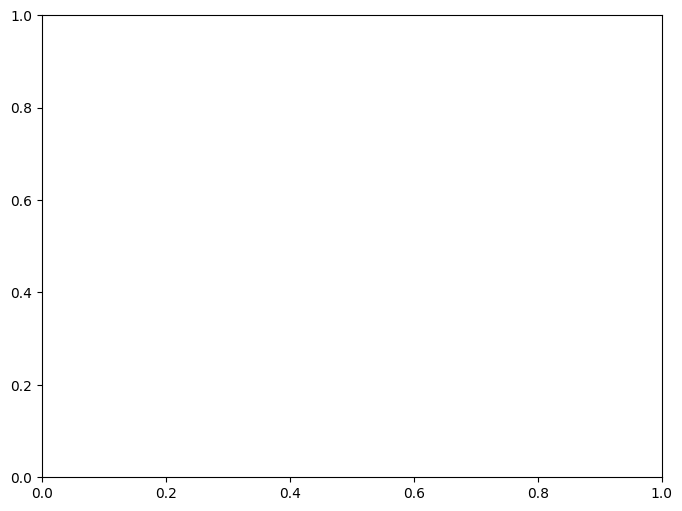

In [ ]:
#Preprocessing
categorical_features = ["season", "is_holiday", "is_workingday", "weather"]
numeric_features = ["temp", "humidity", "windspeed"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features) # drop for avoiding dummy variable trap
    ]
)
# Building model
model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', MLPRegressor(
                hidden_layer_sizes=(64,64), 
                activation='relu', 
                solver='adam', 
                max_iter=500, 
                random_state=42
            )
        )
    ]
)

#Train model
model.fit(X_train, y_train)

# Evaluate model on Validation Set
y_val_pred = model.predict(X_val)
print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("Validation MAE:", mean_absolute_error(y_val, y_val_pred))
print("Validation R2:", r2_score(y_val, y_val_pred))

#Evaluate model on Testing Set
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test RMSE:", rmse_test)
print("Test MAE:", mae_test)
print("Test R2:", r2_test)

#Plot Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Predicted vs Actual Bike Demand")
plt.show()

## User Prediction